In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import copy
import plotly.express as px
import pandas as pd
%matplotlib inline

In [3]:
# load data and extract
matdat  = sio.loadmat(('/media/mcespedes/MauricioCT_Drive/Documents/'
                       'Master/Projects/Atlas_Normal_iEEG/Downloaded_Atlas/MNI Open iEEG Atlas'
                       '/MatlabFile/MatlabFile.mat'))

In [5]:
# Sampling rate
srate = matdat['SamplingFrequency'][0]
# Channel region and reshaping:
channelRegion = matdat['ChannelRegion']
channelRegion = np.array(channelRegion).reshape(1,channelRegion.size)[0]
# Channel region and reshaping:
regionName = matdat['RegionName']
regionName = np.array([region[0] for region in regionName.reshape(1,regionName.size)[0][:]])
# EEG data:
EEGdata = np.array(matdat['Data_W'])
# Reallocate space used by the rest of the original data
del(matdat)

In [7]:
# Time vector for plotting:
N = EEGdata.shape[0] # number of point
t = np.arange(0, N)/srate

In [6]:
# Plotting results for hippocampus
channel = 'Hippocampus'
num_channel = np.where(regionName == channel)[0]+1
id_channel = np.where(channelRegion == num_channel)[0]
channel_data = EEGdata[:,id_channel]
channel_data = channel_data.transpose()

In [7]:
channel_data.shape

(19, 13600)

In [62]:
# ERP for the channel:
df = pd.DataFrame({
    'Amplitude (mV)' : np.mean(channel_data, axis = 0),
    'Time (s)' : t
})
fig = px.line(df, x="Time (s)", y="Amplitude (mV)", title='Hippocampus ERP')
fig.show()

In [91]:
# Welch method
# create Hann window
winsize = int( 2.0*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
spectres = 0.01; # Hz
nfft = int(srate/spectres)

In [95]:
f, welchpow = scipy.signal.welch(channel_data,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/2,nfft=nfft, scaling='density')

In [96]:
# Normalization:
welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2, axis=1)).reshape(welchpow.shape[0],1))

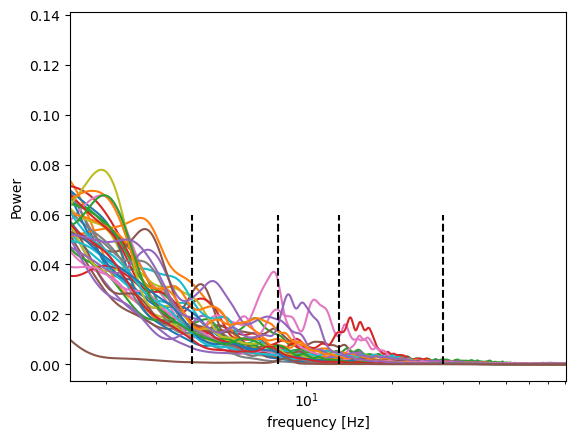

In [97]:
fig, ax = plt.subplots()
ax.semilogx(f,welchpow.transpose())
ax.plot([4, 4], [0, 0.12], '--k')
ax.plot([8, 8], [0, 0.12], '--k')
ax.plot([13, 13], [0, 0.12], '--k')
ax.plot([30, 30], [0, 0.12], '--k')
ax.set_xlim([1.5,81])
ax.set_ylim([0, 0.12])
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Power')
# ax.set_xscale('log')
plt.show()

In [98]:
# Get median:
median_welchpow = np.median(welchpow, axis=0)

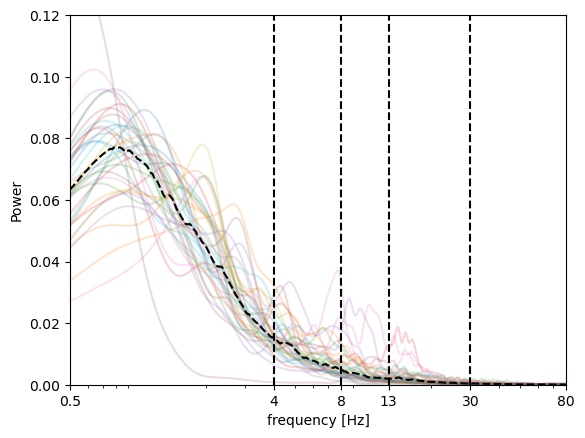

In [104]:
x_val = [0.5, 4, 8, 13, 30, 80]
default_x_ticks = range(len(x_val))

fig, ax = plt.subplots()
ax.semilogx(f,welchpow.transpose(),alpha=0.2)
ax.semilogx(f, median_welchpow.transpose(), '--k')
ax.semilogx([4, 4], [0, 0.12], '--k')
ax.semilogx([8, 8], [0, 0.12], '--k')
ax.semilogx([13, 13], [0, 0.12], '--k')
ax.semilogx([30, 30], [0, 0.12], '--k')
ax.set_xticks(x_val)
ax.set_xticklabels(x_val)
ax.set_xlim([0.5,80])
ax.set_ylim([0, 0.12])
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Power')
# ax.set_xscale('log')
plt.show()

In [101]:
# FFT for the channel:
df = pd.DataFrame({
    'Amplitude' : median_welchpow,
    'Frequency (hz)' : f
})
fig = px.line(df, x="Frequency (hz)", y="Amplitude", title='Hippocampus FFT', log_x=True)
fig.update_layout(xaxis_range=[np.log(0.5),np.log10(80)])
fig.show()

# FFT

In [79]:
eegpow = np.abs( scipy.fftpack.fft(channel_data)/N )**2
hz = np.linspace(0,srate/2,int(np.floor(N/2)+1))

In [80]:
eegpow = np.divide(eegpow, np.sqrt(np.sum(eegpow**2, axis=1)).reshape(eegpow.shape[0],1))

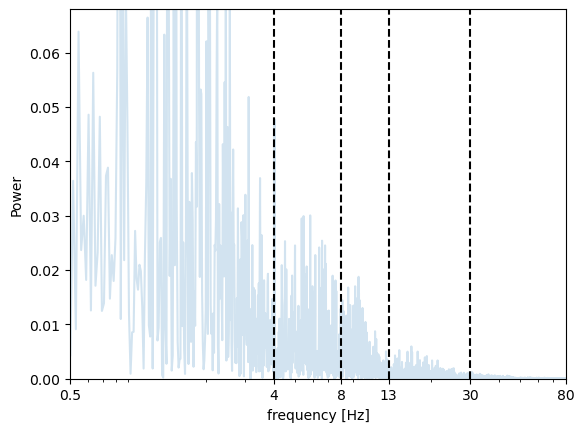

In [84]:
fig, ax = plt.subplots()
ax.semilogx(hz,eegpow[3,0:len(hz)].transpose(),alpha=0.2)
ax.semilogx([4, 4], [0, 0.068], '--k')
ax.semilogx([8, 8], [0, 0.068], '--k')
ax.semilogx([13, 13], [0, 0.068], '--k')
ax.semilogx([30, 30], [0, 0.068], '--k')
ax.set_xticks(x_val)
ax.set_xticklabels(x_val)
ax.set_xlim([0.5,80])
ax.set_ylim([0, 0.068])
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Power')
# ax.set_xscale('log')
plt.show()

In [81]:
median_eegpow = np.median(eegpow, axis=0)

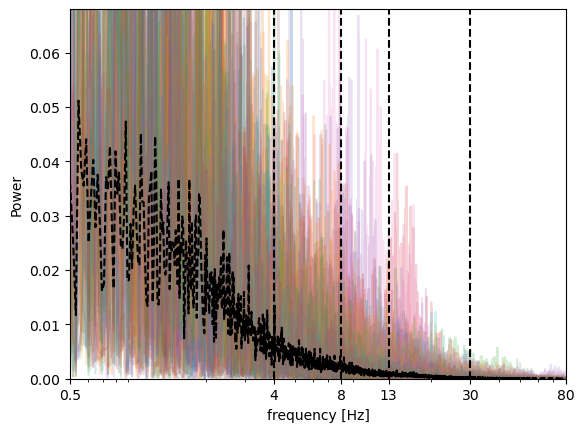

In [82]:
x_val = [0.5, 4, 8, 13, 30, 80]
default_x_ticks = range(len(x_val))

fig, ax = plt.subplots()
ax.semilogx(hz,eegpow[:,0:len(hz)].transpose(),alpha=0.2)
ax.semilogx(hz, median_eegpow[0:len(hz)].transpose(), '--k')
ax.semilogx([4, 4], [0, 0.068], '--k')
ax.semilogx([8, 8], [0, 0.068], '--k')
ax.semilogx([13, 13], [0, 0.068], '--k')
ax.semilogx([30, 30], [0, 0.068], '--k')
ax.set_xticks(x_val)
ax.set_xticklabels(x_val)
ax.set_xlim([0.5,80])
ax.set_ylim([0, 0.068])
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Power')
# ax.set_xscale('log')
plt.show()

In [21]:
import mne
file = "/media/mcespedes/MauricioCT_Drive/Documents/Master/Projects/Atlas_Normal_iEEG/Downloaded_Atlas/MNI Open iEEG Atlas/Wakefulness_AllRegions/Hippocampus_W.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()

Extracting EDF parameters from /media/mcespedes/MauricioCT_Drive/Documents/Master/Projects/Atlas_Normal_iEEG/Downloaded_Atlas/MNI Open iEEG Atlas/Wakefulness_AllRegions/Hippocampus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [32]:
data.info

<Info | 7 non-empty values
 bads: []
 ch_names: GD002Rb1W, GD002Rb2W, GD008Lb_1W, GD008Lb_2W, GD008Lb_3W, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 1970-01-01 00:00:00 UTC
 nchan: 36
 projs: []
 sfreq: 200.0 Hz
>

In [22]:
# Welch method
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
spectres = 0.5 # Hz
nfft = srate*100.0

In [23]:
f, welchpow = scipy.signal.welch(raw_data,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/2,nfft=nfft)

In [24]:
welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2, axis=1)).reshape(welchpow.shape[0],1))

In [ ]:
welchpow.shape

In [25]:
# Normalization:
welchpow = np.divide(welchpow, welchpow.max(axis=1).reshape(36,1))
# Get median:
median_welchpow = np.median(welchpow, axis=0)
# FFT for the channel:
df = pd.DataFrame({
    'Amplitude' : median_welchpow,
    'Frequency (hz)' : f
})
fig = px.line(df, x="Frequency (hz)", y="Amplitude", title='Hippocampus FFT')
fig.show()